In [3]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
train=pd.read_csv("C:\\Users\\faten\\Desktop\\movies_train.csv")
test=pd.read_csv("C:\\Users\\faten\\Desktop\\movies_test.csv")
submission=pd.read_csv("C:\\Users\\faten\\Desktop\\submission.csv")

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


#데이터 살펴보기

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
pd.options.display.float_format = '{:.1f}'.format

In [8]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [9]:
test.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
count,243.0,107.0,243.0,243.0,243.0
mean,109.8,891669.5,0.9,159.3,3.5
std,124.0,1217341.5,1.2,163.0,2.1
min,40.0,34.0,0.0,0.0,0.0
25%,91.0,62502.0,0.0,18.0,2.0
50%,104.0,493120.0,0.0,105.0,3.0
75%,114.5,1080849.6,1.0,282.0,4.0
max,2015.0,6173099.5,6.0,776.0,16.0


#결측치 확인 및 데이터 전처리

In [10]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [11]:
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
train['dir_prev_bfnum'].fillna(0, inplace=True)


In [13]:
train['release_time']=pd.to_datetime(train['release_time'])


# 데이터 시각화 및 분석

### 1)배급사 중 관객수가 제일 많은 곳: 가장 많은 관객을 동원한 배급사는 CJ E&M이라는 것을 알 수 있다. 추가적으로, 상위 5개 배급사를 bar plot으로 나타내었다.

<AxesSubplot:xlabel='distributor'>

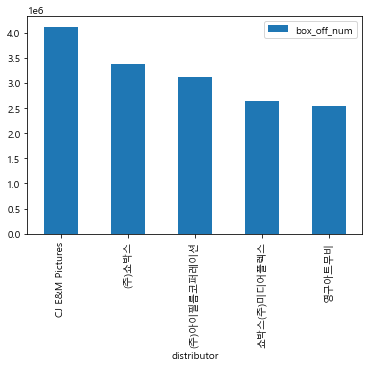

In [14]:
train[['distributor','box_off_num']].groupby('distributor').mean().sort_values(by='box_off_num',ascending=False)
top5=train[['distributor','box_off_num']].groupby('distributor').mean().sort_values(by='box_off_num',ascending=False).head(5)
top5.plot(kind='bar')

### 2)장르별 관객 동원수: 느와르, 액션, SF 순으로 관객수가 많다. 

<AxesSubplot:xlabel='genre'>

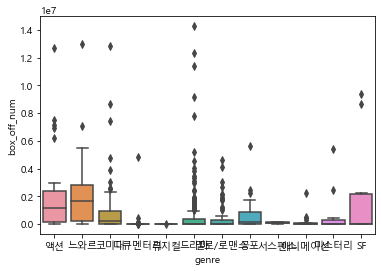

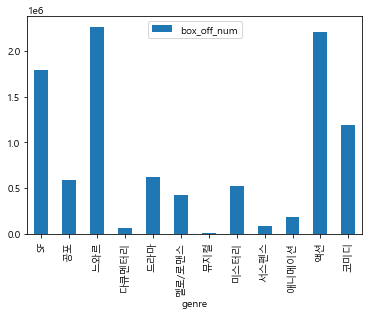

In [15]:
baxplot=plt.subplots()
boxplot=sns.boxplot(x='genre', y='box_off_num', data=train)
train[['genre','box_off_num']].groupby('genre').mean().sort_values(by='genre',ascending=False)
train[['genre','box_off_num']].groupby('genre').mean().plot(kind='bar')

### 3)월별에 따른 관객수의 차이: 연휴가 많은 1,7,8,12월에 가장 관객수가 많다.

<AxesSubplot:xlabel='release_month'>

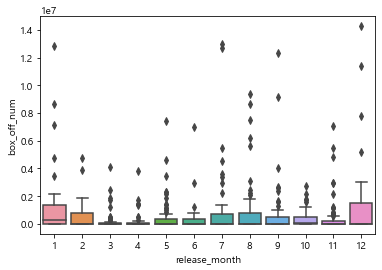

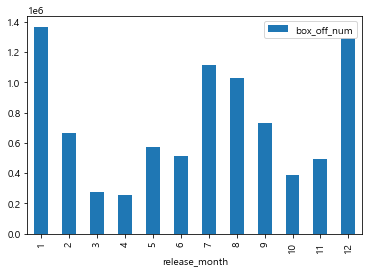

In [45]:
train['release_month']=train['release_time'].dt.month   #월
train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending=False)
baxplot=plt.subplots()
boxplot=sns.boxplot(x='release_month', y='box_off_num', data=train)
train[['release_month','box_off_num']].groupby('release_month').mean().plot(kind='bar')

### 4)장르별 스태프 동원수: 액션, 느와르, 드라마 순으로 스태프를 많이 쓰고, 뮤지컬이 가장 적다.

<AxesSubplot:xlabel='genre'>

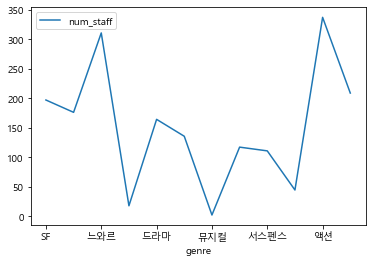

In [46]:
train[['genre','num_staff']].groupby('genre').mean().plot(kind="line")

### 5) 감독의 전작품수가 관객수에 미치는 영향: 감독의 전작품수가 관객수에는 크게 영향을 미치지 않는 것으로 나타났다.

<AxesSubplot:xlabel='dir_prev_bfnum'>

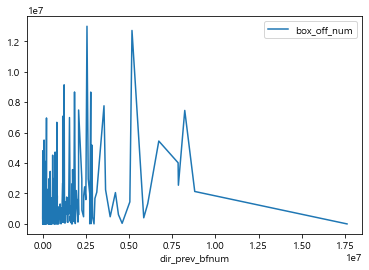

In [52]:
train[["dir_prev_bfnum","box_off_num"]].groupby("dir_prev_bfnum").mean().sort_values(by="dir_prev_bfnum",ascending=True).plot(kind="line")